# 組員：NCTS 周柏穎 林汶毅

## 主題:訓練模型以準確識別每張圖像中的動物或運輸物體

## 使用卷積神經網路CNN識別各種圖像，內容包括 :飛機、狗、貓、車子、機車、花、水果、人

## 實作：

### 資料來源：下載kaggle Natural Images

#### 資料處理 

#將不同分類的資料夾下的圖片轉成同一尺寸（只能個別轉）
#import numpy as np
#import os
#import cv2

#DATADIR="路徑"
#IMG_SIZE=80
#path=os.path.join(DATADIR) 
#img_list=os.listdir(path)
#ind=0
#for i in img_list:
    #img_array=cv2.imread(os.path.join(path,i),cv2.IMREAD_COLOR)
    #new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    #img_name=str(ind)+'.jpg'
    #save_path='D:\\Code\\resized\\'+str(ind)+'.jpg'
    #ind=ind+1
    #cv2.imwrite(save_path,new_array)

#### 將圖片分成訓練集和測試集並利用程式改檔名
#import os 

#label_name = os.listdir("/Users/wen/Desktop/Ipython Folder/AI_Math/My Python Lab/data/train")[1:3]+label_name = os.listdir("/Users/wen/Desktop/Ipython Folder/AI_Math/My Python Lab/data/train")[5:]
#for j in label_name:
    
    #path = "/Users/wen/Desktop/Ipython Folder/AI_Math/My Python Lab/data/train/"+j+"/"
    #files = os.listdir(path)
    #n = 1
    #for i in files:
        #old = path+i
        #new = path+j+"_"+str(n)+".jpg"
        #os.rename(old, new)
        #n = n+1

##  Python 程式 

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from PIL import Image


from matplotlib.font_manager import FontProperties


from sklearn.datasets import load_files
import keras
from keras.utils import np_utils 

from keras.preprocessing.image import array_to_img, img_to_array, load_img

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense
from keras.layers import Flatten
from keras.layers import Dropout



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
font = FontProperties(fname=r'/Users/wen/Library/Fonts/NotoSansCJKtc-Bold.otf', size=14)

In [4]:
train_data = './data/train'
test_data = './data/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_train, y_train,target_labels = load_dataset(train_data)
x_test, y_test,test_labels = load_dataset(test_data)
print('Loaded !')

print('訓練圖片數量 : ' , x_train.shape[0])  
print('測試圖片數量 : ', x_test.shape[0]) 

Loaded !
訓練圖片數量 :  4735
測試圖片數量 :  2164


In [5]:
x_train, y_train

(array(['./data/train/fruit/fruit568.jpg',
        './data/train/fruit/fruit816.jpg',
        './data/train/person/person468.jpg', ...,
        './data/train/dog/dog204.jpg', './data/train/flower/flower528.jpg',
        './data/train/fruit/fruit100.jpg'], dtype='<U39'),
 array([5, 5, 7, ..., 3, 4, 5]))

In [6]:
## 種類數量
num_categories = len(np.unique(y_train))
num_categories

8

In [7]:
Y_train = np_utils.to_categorical(y_train,num_categories) 
Y_test = np_utils.to_categorical(y_test,num_categories)
Y_train[0] 

array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
x_test,x_valid = x_test[1000:],x_test[:1000] 
Y_test,Y_valid = Y_test[1000:],Y_test[:1000] 
print('Vaildation x : ',x_valid.shape)
print('Vaildation y :',Y_valid.shape)
print('Test x : ',x_test.shape)
print('Test y : ',Y_test.shape)

Vaildation x :  (1000,)
Vaildation y : (1000, 8)
Test x :  (1164,)
Test y :  (1164, 8)


In [10]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))   
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training_data_shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation_data_shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test_data_shape : ',x_test.shape)

print('1st_training_image_shape ',x_train[0].shape)

Training_data_shape :  (4735, 80, 80, 3)
Validation_data_shape :  (1000, 80, 80, 3)
Test_data_shape :  (1164, 80, 80, 3)
1st_training_image_shape  (80, 80, 3)


In [11]:
print('1st training image as array',x_train[0]) 

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 254. 255.]
  [255. 254. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 254. 255.]
  [255. 254. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 253.]
  [255. 255. 253.]
  [254. 254. 252.]
  ...
  [255. 255. 255.]
  [254. 255. 255.]
  [254. 255. 255.]]

 [[255. 255. 253.]
  [255. 255. 253.]
  [255. 255. 253.]
  ...
  [254. 255. 255.]
  [254. 255. 255.]
  [254. 255. 255.]]

 [[255. 255. 251.]
  [255. 255. 253.]
  [255. 255. 253.]
  ...
  [254. 255. 255.]
  [254. 255. 255.]
  [254. 255. 255.]]]


In [12]:
# 資料整理 正規化 將資料線性單位化至  [0,1] 
X_train = x_train.astype('float32')/255
X_valid = x_valid.astype('float32')/255
X_test = x_test.astype('float32')/255

In [13]:
X_train.min(), X_train.max()

(0.0, 1.0)

### 建立 CNN 模型

In [14]:
model = Sequential() 
 
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), padding='same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3))) 
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.25)) 

model.add(Flatten()) 
model.add(Dense(1024)) 
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

model.add(Dense(num_categories)) 
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### 組裝

In [15]:
from keras.optimizers import SGD
model.compile(loss='binary_crossentropy',
             optimizer = SGD(lr=0.01),
             metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 80, 80, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
__________

### 訓練網路  

In [17]:
history = model.fit(X_train,Y_train, batch_size = 32, epochs = 50 
          ,validation_data = (X_valid, Y_valid), verbose = 2) 

Instructions for updating:
Use tf.cast instead.
Train on 4735 samples, validate on 1000 samples
Epoch 1/50
 - 35s - loss: 0.3760 - acc: 0.8750 - val_loss: 0.3767 - val_acc: 0.8750
Epoch 2/50
 - 34s - loss: 0.3735 - acc: 0.8750 - val_loss: 0.3768 - val_acc: 0.8750
Epoch 3/50
 - 33s - loss: 0.3717 - acc: 0.8750 - val_loss: 0.3765 - val_acc: 0.8750
Epoch 4/50
 - 35s - loss: 0.3694 - acc: 0.8750 - val_loss: 0.3753 - val_acc: 0.8750
Epoch 5/50
 - 35s - loss: 0.3658 - acc: 0.8750 - val_loss: 0.3726 - val_acc: 0.8750
Epoch 6/50
 - 36s - loss: 0.3600 - acc: 0.8751 - val_loss: 0.3677 - val_acc: 0.8750
Epoch 7/50
 - 37s - loss: 0.3485 - acc: 0.8791 - val_loss: 0.3535 - val_acc: 0.8789
Epoch 8/50
 - 37s - loss: 0.3360 - acc: 0.8859 - val_loss: 0.3416 - val_acc: 0.8850
Epoch 9/50
 - 37s - loss: 0.3227 - acc: 0.8872 - val_loss: 0.3292 - val_acc: 0.8848
Epoch 10/50
 - 37s - loss: 0.3113 - acc: 0.8888 - val_loss: 0.3225 - val_acc: 0.8851
Epoch 11/50
 - 38s - loss: 0.3005 - acc: 0.8914 - val_loss: 0.3

### 儲存權重

In [18]:
model.save('model.h5')

### 檢視結果

In [19]:
score = model.evaluate(X_test, Y_test)

1164/1164 [==============================] - 2s 2ms/step


In [20]:
print(f'測試資料的 loss = {score[0]}')
print(f'測試資正確率 = {score[1]}')

測試資料的 loss = 0.10712183483226602
測試資正確率 = 0.9561855670103093


### 對正確率作圖

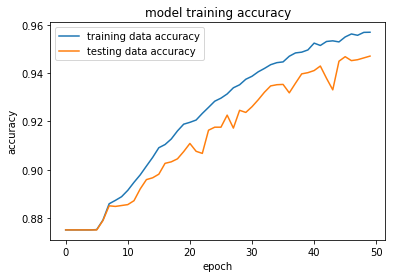

In [21]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["training data accuracy", "testing data accuracy"], loc = "best")
plt.show()

### 影像辨識

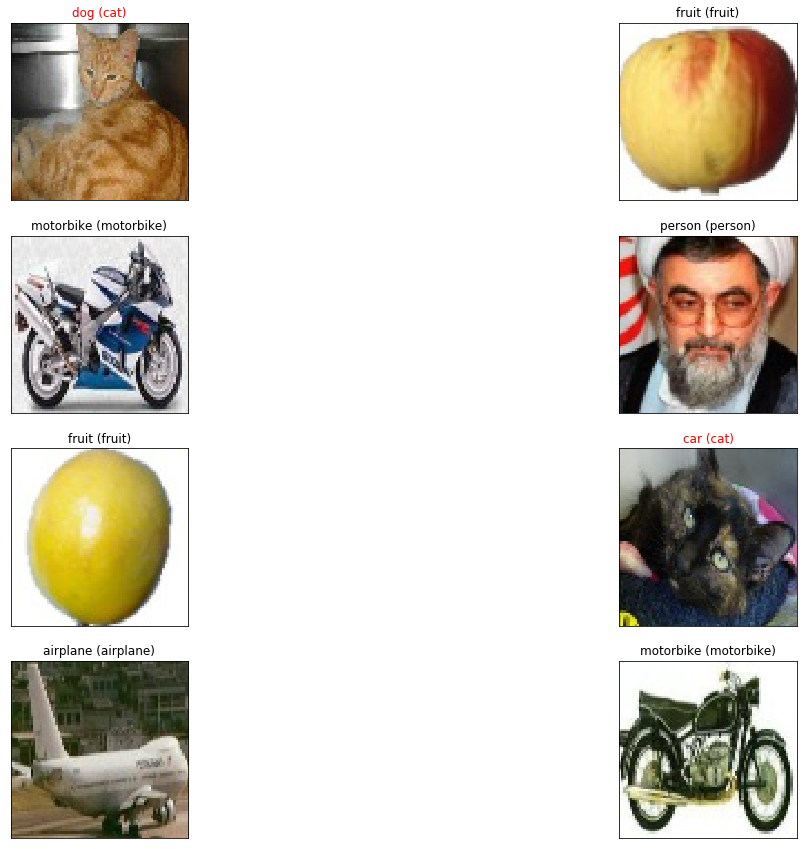

In [41]:
Y_pred = model.predict(X_test)

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=8, replace=False)):
    ax = fig.add_subplot(4, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("black" if pred_idx == true_idx else "red"))

### 結果

成功辨識了好幾種影像，但還是有錯誤的，因此可能神經網路還要再訓練更好一點才行